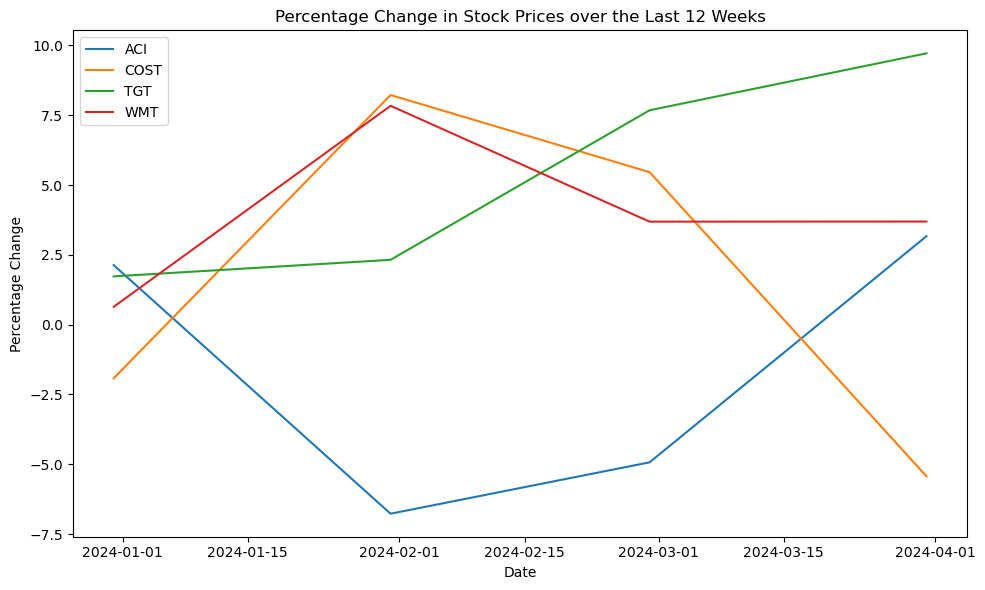

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the weekly stock data from the CSV files for each stock
stock_data_cost = pd.read_csv('../data/COST.csv')
stock_data_wmt = pd.read_csv('../data/WMT.csv')
stock_data_tgt = pd.read_csv('../data/TGT.csv')
stock_data_aci = pd.read_csv('../data/ACI.csv')

# Add a 'Symbol' column to each DataFrame
stock_data_cost['Symbol'] = 'COST'
stock_data_wmt['Symbol'] = 'WMT'
stock_data_tgt['Symbol'] = 'TGT'
stock_data_aci['Symbol'] = 'ACI'

# Combine the individual DataFrames into one
combined_data = pd.concat([stock_data_cost, stock_data_wmt, stock_data_tgt, stock_data_aci])

# Convert the date column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Define the end date (March 18, 2024)
end_date = pd.to_datetime('2024-03-18')

# Filter the data for the last 12 weeks from the end date
last_12_weeks_data = combined_data[(combined_data['Date'] >= end_date - pd.DateOffset(weeks=12)) & (combined_data['Date'] <= end_date)]

# Group the filtered data by symbol and month and calculate percentage change for each stock
monthly_data = last_12_weeks_data.groupby(['Symbol', pd.Grouper(key='Date', freq='M')]).agg({
    'Open': 'first',
    'Close': 'last'
}).reset_index()
monthly_data['Price_Difference'] = monthly_data['Close'] - monthly_data['Open']
monthly_data['Percentage_Change'] = (monthly_data['Price_Difference'] / monthly_data['Open']) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for symbol, symbol_data in monthly_data.groupby('Symbol'):
    ax.plot(symbol_data['Date'], symbol_data['Percentage_Change'], label=symbol)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Stock Prices over the Last 12 Weeks')
ax.legend()

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Save the plot as an image file
plt.savefig('../output/percentage_change_last_12_weeks_plot.png')